In [110]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import nltk
from nltk.stem import PorterStemmer
stemming = PorterStemmer()
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) 
import sidetable as stb
import datetime as dt
import textblob 
from textblob import TextBlob

In [2]:
review = pd.read_csv("drugreview.csv",usecols=[1,2,3,4,5,6])

In [3]:
review.loc[2:5]


,drugName,condition,review,rating,date,usefulCount
2,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,"September 29, 2017",3
3,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,"March 5, 2017",35
4,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,"October 22, 2015",4
5,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,"July 3, 2014",13


In [4]:
review.columns=review.columns.str.lower()

In [5]:
review.dtypes

drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [6]:
# preprocessing : 
review['date']=pd.to_datetime(review['date'])
review['year'] = review['date'].dt.year
review['month'] = review['date'].dt.month
review['day'] =review['date'].dt.day
review.loc[5:10]

,drugname,condition,review,rating,date,usefulcount,year,month,day
5,Zyclara,Keratosis,"""4 days in on first 2 weeks. Using on arms an...",4,2014-07-03,13,2014,7,3
6,Copper,Birth Control,"""I&#039;ve had the copper coil for about 3 mon...",6,2016-06-06,1,2016,6,6
7,Amitriptyline,Migraine Prevention,"""This has been great for me. I&#039;ve been on...",9,2009-04-21,32,2009,4,21
8,Methadone,Opiate Withdrawal,"""Ive been on Methadone for over ten years and ...",7,2016-10-18,21,2016,10,18
9,Levora,Birth Control,"""I was on this pill for almost two years. It d...",2,2011-04-16,3,2011,4,16
10,Paroxetine,Hot Flashes,"""Holy Hell is exactly how I feel. I had been t...",1,2017-02-22,17,2017,2,22


In [7]:
review.dtypes

drugname               object
condition              object
review                 object
rating                  int64
date           datetime64[ns]
usefulcount             int64
year                    int64
month                   int64
day                     int64
dtype: object

In [8]:
# Rating count   ----  10 
review.loc[review['rating'] == 10,:]['drugname'].value_counts().head(20)

Levonorgestrel                        497
Phentermine                           272
Etonogestrel                          224
Varenicline                           187
Clonazepam                            154
Ethinyl estradiol / norethindrone     148
Escitalopram                          143
Sertraline                            141
Alprazolam                            134
Chantix                               124
Mirena                                122
Nexplanon                             121
Liraglutide                           115
Ethinyl estradiol / levonorgestrel    115
Plan B                                114
Lexapro                               113
Belviq                                112
Implanon                              112
Bupropion                             110
Gabapentin                            107
Name: drugname, dtype: int64

In [9]:
# rating count by  5 

review.loc[review['rating'] == 5,:]['drugname'].value_counts().head(20)

Etonogestrel                          87
Levonorgestrel                        87
Ethinyl estradiol / norethindrone     67
Nexplanon                             57
Ethinyl estradiol / levonorgestrel    57
Ethinyl estradiol / norgestimate      56
Implanon                              38
Mirena                                36
Metronidazole                         26
Miconazole                            26
Contrave                              21
Skyla                                 21
Ethinyl estradiol / etonogestrel      21
Sertraline                            20
Drospirenone / ethinyl estradiol      20
Desogestrel / ethinyl estradiol       19
NuvaRing                              19
Bupropion                             19
Quetiapine                            18
Medroxyprogesterone                   18
Name: drugname, dtype: int64

In [10]:
review.loc[review['rating'] == 1,:]['drugname'].value_counts().head(20)

Miconazole                            199
Etonogestrel                          183
Ethinyl estradiol / norethindrone     165
Nexplanon                             133
Levonorgestrel                        132
Ethinyl estradiol / norgestimate      127
Tioconazole                           122
Ethinyl estradiol / levonorgestrel    105
Medroxyprogesterone                   102
Depo-Provera                           91
Duloxetine                             64
Mirena                                 59
Sertraline                             52
Implanon                               51
Bisacodyl                              50
Bupropion / naltrexone                 47
Tramadol                               47
Gabapentin                             45
Lo Loestrin Fe                         45
Cymbalta                               45
Name: drugname, dtype: int64

In [11]:
#
mean_rating = dict(review.groupby(review['date'].dt.year)['rating'].mean())

In [12]:
mean_rating.keys(),mean_rating.values()

(dict_keys([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]),
 dict_values([8.862257281553399, 7.398152770843734, 7.528784648187633, 7.543743372216331, 7.544888888888889, 8.133300661602549, 8.001233654083395, 6.896101019051839, 6.172800679983, 5.992085862966175]))

Text(0, 0.5, 'Rating')

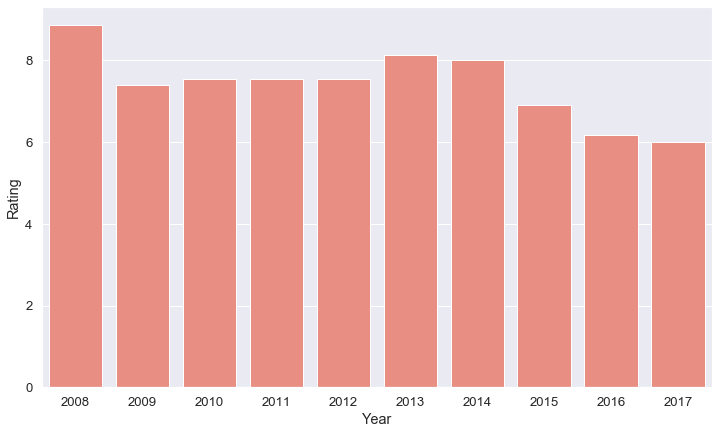

In [13]:
# Year wise mean Rating -----

plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'darkgrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'salmon');
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating")

In [14]:
# Top 100 drugs here 




In [15]:
# Clean columns : Review columnns
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    # Replacing Two or more dots with one
    cleannum = multiw_remove.str.replace(r'\.{2,}', ' ')
    # cleaning numbers
    dataframe = cleannum.str.replace('\d+', '')
    
    return dataframe

In [16]:
review['review']=review_clean(review['review'])  # cleaned review 

review

,drugname,condition,review,rating,date,usefulcount,year,month,day
0,Mirtazapine,Depression,ive tried a few antidepressants over the years...,10,2012-02-28,22,2012,2,28
1,Mesalamine,"Crohn's Disease, Maintenance",my son has crohns disease and has done very we...,8,2009-05-17,17,2009,5,17
2,Bactrim,Urinary Tract Infection,quick reduction of symptoms,9,2017-09-29,3,2017,9,29
3,Contrave,Weight Loss,contrave combines drugs that were used for alc...,9,2017-03-05,35,2017,3,5
4,Cyclafem 1 / 35,Birth Control,i have been on this birth control for one cycl...,9,2015-10-22,4,2015,10,22
...,...,...,...,...,...,...,...,...,...
53761,Tamoxifen,"Breast Cancer, Prevention",i have taken tamoxifen for years side effects...,10,2014-09-13,43,2014,9,13
53762,Escitalopram,Anxiety,ive been taking lexapro escitaploprgram since ...,9,2016-10-08,11,2016,10,8
53763,Levonorgestrel,Birth Control,im married years old and i have no kids takin...,8,2010-11-15,7,2010,11,15
53764,Tapentadol,Pain,i was prescribed nucynta for severe neck shoul...,1,2011-11-28,20,2011,11,28


In [17]:
review['drugname']=review_clean(review.drugname) # cleaned drugname 
review.drugname.head(10)

0      mirtazapine
1       mesalamine
2          bactrim
3         contrave
4       cyclafem  
5          zyclara
6           copper
7    amitriptyline
8        methadone
9           levora
Name: drugname, dtype: object

In [18]:
review['condition']=review_clean(review.condition)  # clean condition
review.condition.head(10)

0                     depression
1    crohn s disease maintenance
2        urinary tract infection
3                    weight loss
4                  birth control
5                      keratosis
6                  birth control
7            migraine prevention
8              opiate withdrawal
9                  birth control
Name: condition, dtype: object

In [19]:
# review tokenization


In [20]:
def identify_tokens(row):
    review = row['review']
    tokens = nltk.word_tokenize(review)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [21]:
review['words'] = review.apply(identify_tokens, axis=1)

In [22]:
review['words'].head(20)

0     [ive, tried, a, few, antidepressants, over, th...
1     [my, son, has, crohns, disease, and, has, done...
2                      [quick, reduction, of, symptoms]
3     [contrave, combines, drugs, that, were, used, ...
4     [i, have, been, on, this, birth, control, for,...
5     [days, in, on, first, weeks, using, on, arms, ...
6     [ive, had, the, copper, coil, for, about, mont...
7     [this, has, been, great, for, me, ive, been, o...
8     [ive, been, on, methadone, for, over, ten, yea...
9     [i, was, on, this, pill, for, almost, two, yea...
10    [holy, hell, is, exactly, how, i, feel, i, had...
11    [honestly, its, day, one, on, the, day, treatm...
12    [this, is, a, waste, of, money, did, not, curb...
13                [no, problems, watch, what, you, eat]
14    [ditto, on, rebound, sleepless, when, disconti...
15    [a, doctor, in, the, er, prescribed, me, mg, o...
16    [i, smoked, for, years, took, it, for, one, we...
17    [so, i, was, on, ginanvi, for, about, mont

In [23]:
def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

review['stemwords'] = review.apply(stem_list, axis=1)

In [24]:
review['stemwords']

0        [ive, tri, a, few, antidepress, over, the, yea...
1        [my, son, ha, crohn, diseas, and, ha, done, ve...
2                             [quick, reduct, of, symptom]
3        [contrav, combin, drug, that, were, use, for, ...
4        [i, have, been, on, thi, birth, control, for, ...
                               ...                        
53761    [i, have, taken, tamoxifen, for, year, side, e...
53762    [ive, been, take, lexapro, escitaploprgram, si...
53763    [im, marri, year, old, and, i, have, no, kid, ...
53764    [i, wa, prescrib, nucynta, for, sever, neck, s...
53765                                           [it, work]
Name: stemwords, Length: 53766, dtype: object

In [25]:
def remove_stops(row):
    my_list = row['stemwords']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

In [26]:
review['stem_meaningful'] = review.apply(remove_stops, axis=1)

In [27]:
review['stem_meaningful'].head(10)

0    [ive, tri, antidepress, year, citalopram, fluo...
1    [son, ha, crohn, diseas, ha, done, veri, well,...
2                             [quick, reduct, symptom]
3    [contrav, combin, drug, use, alcohol, smoke, o...
4    [thi, birth, control, one, cycl, read, review,...
5    [day, first, week, use, arm, face, put, vaseli...
6    [ive, copper, coil, month, wa, realli, excit, ...
7    [thi, ha, great, ive, week, last, week, onli, ...
8    [ive, methadon, ten, year, current, tri, get, ...
9    [wa, thi, pill, almost, two, year, doe, work, ...
Name: stem_meaningful, dtype: object

In [28]:
def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

In [29]:
review['processed'] = review.apply(rejoin_words, axis=1)

In [30]:
review

,drugname,condition,review,rating,date,usefulcount,year,month,day,words,stemwords,stem_meaningful,processed
0,mirtazapine,depression,ive tried a few antidepressants over the years...,10,2012-02-28,22,2012,2,28,"[ive, tried, a, few, antidepressants, over, th...","[ive, tri, a, few, antidepress, over, the, yea...","[ive, tri, antidepress, year, citalopram, fluo...",ive tri antidepress year citalopram fluoxetin ...
1,mesalamine,crohn s disease maintenance,my son has crohns disease and has done very we...,8,2009-05-17,17,2009,5,17,"[my, son, has, crohns, disease, and, has, done...","[my, son, ha, crohn, diseas, and, ha, done, ve...","[son, ha, crohn, diseas, ha, done, veri, well,...",son ha crohn diseas ha done veri well asacol h...
2,bactrim,urinary tract infection,quick reduction of symptoms,9,2017-09-29,3,2017,9,29,"[quick, reduction, of, symptoms]","[quick, reduct, of, symptom]","[quick, reduct, symptom]",quick reduct symptom
3,contrave,weight loss,contrave combines drugs that were used for alc...,9,2017-03-05,35,2017,3,5,"[contrave, combines, drugs, that, were, used, ...","[contrav, combin, drug, that, were, use, for, ...","[contrav, combin, drug, use, alcohol, smoke, o...",contrav combin drug use alcohol smoke opioid c...
4,cyclafem,birth control,i have been on this birth control for one cycl...,9,2015-10-22,4,2015,10,22,"[i, have, been, on, this, birth, control, for,...","[i, have, been, on, thi, birth, control, for, ...","[thi, birth, control, one, cycl, read, review,...",thi birth control one cycl read review thi typ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,tamoxifen,breast cancer prevention,i have taken tamoxifen for years side effects...,10,2014-09-13,43,2014,9,13,"[i, have, taken, tamoxifen, for, years, side, ...","[i, have, taken, tamoxifen, for, year, side, e...","[taken, tamoxifen, year, side, effect, sever, ...",taken tamoxifen year side effect sever sweat d...
53762,escitalopram,anxiety,ive been taking lexapro escitaploprgram since ...,9,2016-10-08,11,2016,10,8,"[ive, been, taking, lexapro, escitaploprgram, ...","[ive, been, take, lexapro, escitaploprgram, si...","[ive, take, lexapro, escitaploprgram, sinc, fe...",ive take lexapro escitaploprgram sinc februari...
53763,levonorgestrel,birth control,im married years old and i have no kids takin...,8,2010-11-15,7,2010,11,15,"[im, married, years, old, and, i, have, no, ki...","[im, marri, year, old, and, i, have, no, kid, ...","[im, marri, year, old, kid, take, pill, wa, ha...",im marri year old kid take pill wa hassl decid...
53764,tapentadol,pain,i was prescribed nucynta for severe neck shoul...,1,2011-11-28,20,2011,11,28,"[i, was, prescribed, nucynta, for, severe, nec...","[i, wa, prescrib, nucynta, for, sever, neck, s...","[wa, prescrib, nucynta, sever, neck, shoulder,...",wa prescrib nucynta sever neck shoulder pain t...


In [31]:
coloumndelete = ['words', 'stemwords', 'stem_meaningful','review']
review.drop(coloumndelete,axis=1,inplace=True)

In [32]:
medicine = review.copy()


In [33]:
medicine.columns

Index(['drugname', 'condition', 'rating', 'date', 'usefulcount', 'year',
       'month', 'day', 'processed'],
      dtype='object')

In [34]:
medicine.head()  # processed review we have now !

,drugname,condition,rating,date,usefulcount,year,month,day,processed
0,mirtazapine,depression,10,2012-02-28,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...
1,mesalamine,crohn s disease maintenance,8,2009-05-17,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...
2,bactrim,urinary tract infection,9,2017-09-29,3,2017,9,29,quick reduct symptom
3,contrave,weight loss,9,2017-03-05,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...
4,cyclafem,birth control,9,2015-10-22,4,2015,10,22,thi birth control one cycl read review thi typ...


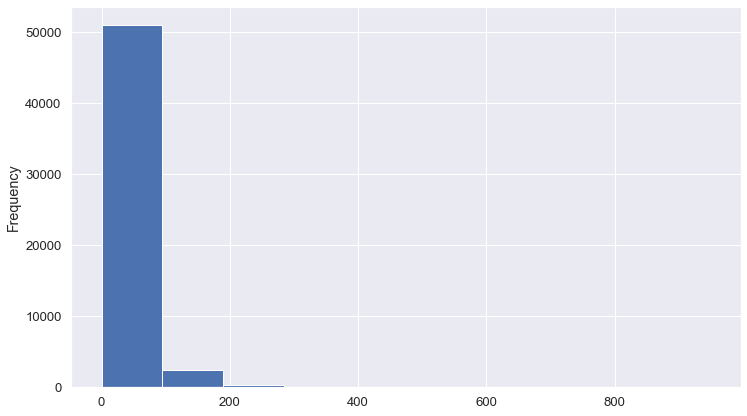

In [35]:
medicine['usefulcount'].plot.hist()

In [36]:
medicine.stb.freq(['usefulcount']).head(10)

,usefulcount,Count,Percent,Cumulative Count,Cumulative Percent
0,2,2152,0.040025,2152,0.040025
1,3,2146,0.039914,4298,0.079939
2,1,2089,0.038854,6387,0.118793
3,0,2084,0.038761,8471,0.157553
4,4,2043,0.037998,10514,0.195551
5,5,1988,0.036975,12502,0.232526
6,6,1781,0.033125,14283,0.265651
7,7,1675,0.031154,15958,0.296805
8,8,1570,0.029201,17528,0.326005
9,9,1477,0.027471,19005,0.353476


In [37]:
# Checking is there any na values 
medicine.isna().sum()

drugname         0
condition      295
rating           0
date             0
usefulcount      0
year             0
month            0
day              0
processed        0
dtype: int64

In [38]:
medicine.dropna(inplace=True)

In [39]:
medicine.isna().sum()

drugname       0
condition      0
rating         0
date           0
usefulcount    0
year           0
month          0
day            0
processed      0
dtype: int64

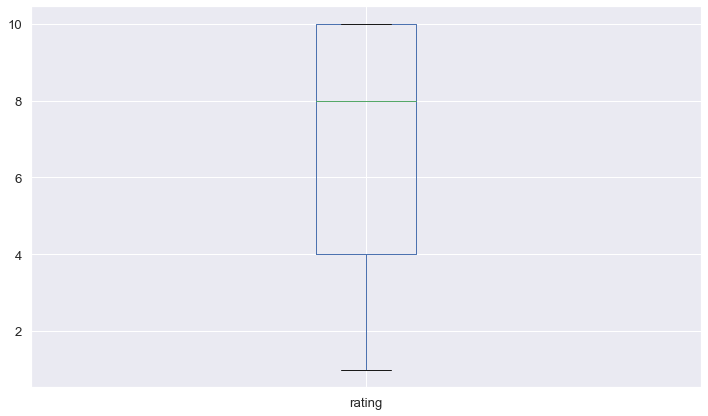

In [40]:
# Checking If there is any outliers:  
medicine['rating'].plot.box()

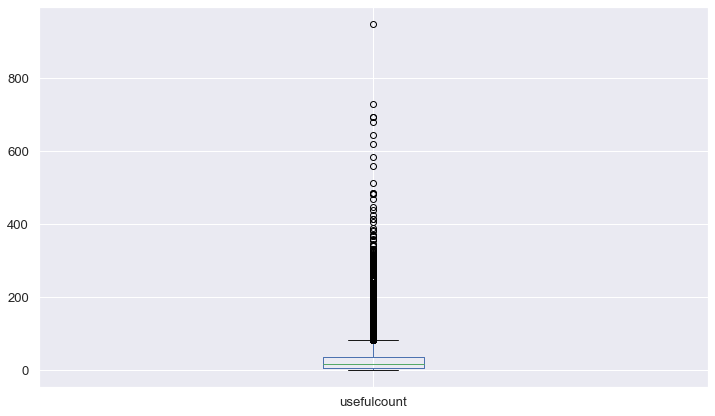

In [41]:
medicine['usefulcount'].plot.box()

In [42]:
medicine.usefulcount.describe()

count    53471.000000
mean        28.083634
std         36.231706
min          0.000000
25%          6.000000
50%         16.000000
75%         36.000000
max        949.000000
Name: usefulcount, dtype: float64

In [43]:
medicine['usefulcount']=medicine['usefulcount'].clip(0,40)

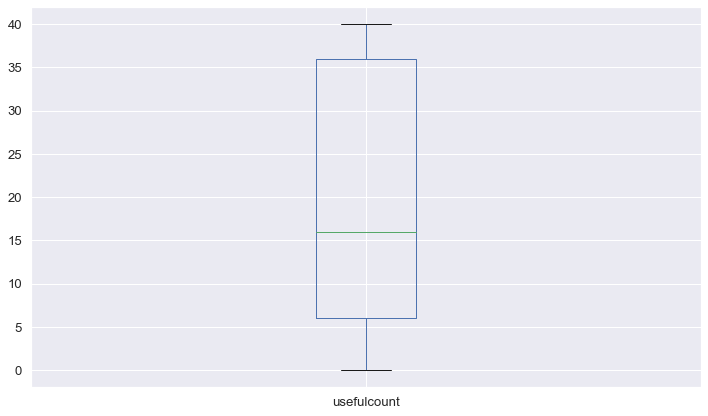

In [44]:
medicine['usefulcount'].plot.box()

In [45]:
coloumndelete = ['date']
medicine.drop(coloumndelete,axis=1,inplace=True)

In [46]:
medicine.rename(columns={'processed':'processed_review'},inplace=True)

In [47]:
medicine.head(10)

,drugname,condition,rating,usefulcount,year,month,day,processed_review
0,mirtazapine,depression,10,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...
1,mesalamine,crohn s disease maintenance,8,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...
2,bactrim,urinary tract infection,9,3,2017,9,29,quick reduct symptom
3,contrave,weight loss,9,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...
4,cyclafem,birth control,9,4,2015,10,22,thi birth control one cycl read review thi typ...
5,zyclara,keratosis,4,13,2014,7,3,day first week use arm face put vaselin lip ey...
6,copper,birth control,6,1,2016,6,6,ive copper coil month wa realli excit thought ...
7,amitriptyline,migraine prevention,9,32,2009,4,21,thi ha great ive week last week onli headach w...
8,methadone,opiate withdrawal,7,21,2016,10,18,ive methadon ten year current tri get thi drug...
9,levora,birth control,2,3,2011,4,16,wa thi pill almost two year doe work far get p...


In [48]:
# Giving the Sentiment according to the ratings
medicine['sentiment_rate'] = medicine['rating'].apply(lambda x: 1 if x > 5 else 0)

In [49]:
medicine

,drugname,condition,rating,usefulcount,year,month,day,processed_review,sentiment_rate
0,mirtazapine,depression,10,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,1
1,mesalamine,crohn s disease maintenance,8,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...,1
2,bactrim,urinary tract infection,9,3,2017,9,29,quick reduct symptom,1
3,contrave,weight loss,9,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...,1
4,cyclafem,birth control,9,4,2015,10,22,thi birth control one cycl read review thi typ...,1
...,...,...,...,...,...,...,...,...,...
53761,tamoxifen,breast cancer prevention,10,40,2014,9,13,taken tamoxifen year side effect sever sweat d...,1
53762,escitalopram,anxiety,9,11,2016,10,8,ive take lexapro escitaploprgram sinc februari...,1
53763,levonorgestrel,birth control,8,7,2010,11,15,im marri year old kid take pill wa hassl decid...,1
53764,tapentadol,pain,1,20,2011,11,28,wa prescrib nucynta sever neck shoulder pain t...,0


In [50]:
from textblob import TextBlob

In [51]:
# Apply sentimental Analysis : =====
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [52]:
medicine['sentimentscore'] = sentiment(medicine.processed_review)

In [53]:
medicine.head()

,drugname,condition,rating,usefulcount,year,month,day,processed_review,sentiment_rate,sentimentscore
0,mirtazapine,depression,10,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,1,-0.122222
1,mesalamine,crohn s disease maintenance,8,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...,1,-0.300000
2,bactrim,urinary tract infection,9,3,2017,9,29,quick reduct symptom,1,0.333333
3,contrave,weight loss,9,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...,1,0.700000
4,cyclafem,birth control,9,4,2015,10,22,thi birth control one cycl read review thi typ...,1,0.208974


In [54]:
medicine.stb.freq(['sentimentscore']).head(10)

,sentimentscore,Count,Percent,Cumulative Count,Cumulative Percent
0,0.000,5936,0.111013,5936,0.111013
1,0.250,841,0.015728,6777,0.126742
2,0.500,780,0.014587,7557,0.141329
3,0.100,572,0.010697,8129,0.152026
4,0.200,532,0.009949,8661,0.161976
5,0.800,496,0.009276,9157,0.171252
6,0.300,373,0.006976,9530,0.178227
7,0.150,348,0.006508,9878,0.184736
8,0.125,348,0.006508,10226,0.191244
9,0.400,347,0.006489,10573,0.197733


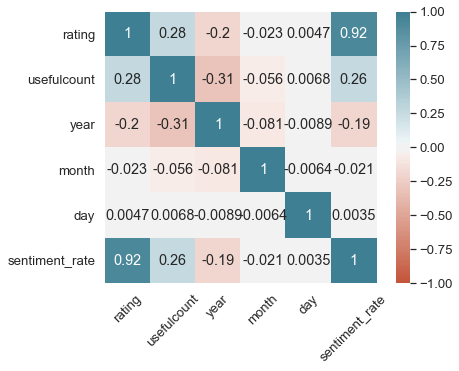

In [55]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = medicine.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [56]:
df=medicine.copy()

In [57]:
df

,drugname,condition,rating,usefulcount,year,month,day,processed_review,sentiment_rate,sentimentscore
0,mirtazapine,depression,10,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,1,-0.122222
1,mesalamine,crohn s disease maintenance,8,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...,1,-0.300000
2,bactrim,urinary tract infection,9,3,2017,9,29,quick reduct symptom,1,0.333333
3,contrave,weight loss,9,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...,1,0.700000
4,cyclafem,birth control,9,4,2015,10,22,thi birth control one cycl read review thi typ...,1,0.208974
...,...,...,...,...,...,...,...,...,...,...
53761,tamoxifen,breast cancer prevention,10,40,2014,9,13,taken tamoxifen year side effect sever sweat d...,1,-0.078571
53762,escitalopram,anxiety,9,11,2016,10,8,ive take lexapro escitaploprgram sinc februari...,1,0.100265
53763,levonorgestrel,birth control,8,7,2010,11,15,im marri year old kid take pill wa hassl decid...,1,0.069949
53764,tapentadol,pain,1,20,2011,11,28,wa prescrib nucynta sever neck shoulder pain t...,0,0.000000


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

In [59]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [60]:
dtm = cv.fit_transform(df['processed_review'])

In [61]:
dtm

<53471x12597 sparse matrix of type '<class 'numpy.int64'>'
	with 1744361 stored elements in Compressed Sparse Row format>

In [62]:
from sklearn.decomposition import LatentDirichletAllocation

In [63]:
LDA = LatentDirichletAllocation(n_components=9,random_state=42)

In [64]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=9, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [65]:
len(cv.get_feature_names())

12597

In [66]:
import random

In [67]:
for i in range(20):
    random_word_id = random.randint(0,12596)
    print(cv.get_feature_names()[random_word_id])

buse
dexa
codien
scrotum
ductal
netflix
dissip
minocyclen
ladi
bulim
endow
wretch
optim
swam
bite
english
imageri
surgeri
tami
mucosa


In [68]:
LDA.components_

array([[ 0.11112136,  4.11099367,  0.11122225, ...,  0.11111452,
         0.11111112,  0.11111112],
       [ 2.27540845,  0.11111111,  0.11111111, ...,  0.11111111,
         0.11111111,  0.11111111],
       [ 0.1111172 ,  0.11111111,  0.11111111, ...,  0.11111111,
         0.11115277,  0.11140283],
       ...,
       [ 0.11111201,  0.11111111,  0.11111111, ...,  0.11111746,
         0.11111112,  2.10938106],
       [36.94672876,  0.11116759,  0.11122901, ...,  0.11111334,
         0.11139667,  0.11187314],
       [ 0.11115054,  0.11111111,  0.11111111, ...,  0.11115617,
         0.11111111,  0.11148669]])

In [69]:
single_topic = LDA.components_[0]

In [70]:
single_topic

array([0.11112136, 4.11099367, 0.11122225, ..., 0.11111452, 0.11111112,
       0.11111112])

In [71]:
# Returns the indices that would sort this array.
single_topic.argsort()

array([ 3947,  1832,  7409, ..., 12088, 10022, 11816], dtype=int64)

In [72]:
top_word_indices = single_topic.argsort()[-10:]
top_word_indices

array([12363, 12478,  1966,  7009,  3905,   108, 11079, 12088, 10022,
       11816], dtype=int64)

In [73]:
for index in top_word_indices:
    print(cv.get_feature_names()[index])

work
year
clear
month
face
acn
thi
wa
skin
use


In [74]:
## Getting Top 9 list of topic  :-----

for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['tri', 'start', 'day', 'ha', 'week', 'work', 'year', 'clear', 'month', 'face', 'acn', 'thi', 'wa', 'skin', 'use']


THE TOP 15 WORDS FOR TOPIC #1
['year', 'start', 'weight', 'week', 'gain', 'day', 'birth', 'im', 'control', 'ive', 'month', 'pill', 'wa', 'period', 'thi']


THE TOP 15 WORDS FOR TOPIC #2
['week', 'month', 'mg', 'lost', 'gain', 'day', 'effect', 'start', 'year', 'wa', 'ha', 'lb', 'eat', 'thi', 'weight']


THE TOP 15 WORDS FOR TOPIC #3
['help', 'medicin', 'ha', 'medic', 'doctor', 'use', 'sever', 'time', 'effect', 'year', 'work', 'day', 'wa', 'thi', 'pain']


THE TOP 15 WORDS FOR TOPIC #4
['drink', 'stomach', 'water', 'bad', 'felt', 'like', 'time', 'tast', 'feel', 'work', 'hour', 'took', 'thi', 'day', 'wa']


THE TOP 15 WORDS FOR TOPIC #5
['help', 'start', 'medic', 'week', 'work', 'ha', 'day', 'feel', 'year', 'effect', 'depress', 'thi', 'anxieti', 'mg', 'wa']


THE TOP 15 WORDS FOR TOPIC #6
['mirena', 'spot', 'im', 'thi', 'year', 'got', 'week', '

In [76]:
dtm
topic_results = LDA.transform(dtm)
topic_results.shape
topic_results[0]

<53471x12597 sparse matrix of type '<class 'numpy.int64'>'
	with 1744361 stored elements in Compressed Sparse Row format>

In [80]:
topic_results[0].argmax()

5

In [81]:
df['Topic'] = topic_results.argmax(axis=1)

In [87]:
df.head()

,drugname,condition,rating,usefulcount,year,month,day,processed_review,sentiment_rate,sentimentscore,Topic
0,mirtazapine,depression,10,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,1,-0.122222,5
1,mesalamine,crohn s disease maintenance,8,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...,1,-0.300000,2
2,bactrim,urinary tract infection,9,3,2017,9,29,quick reduct symptom,1,0.333333,2
3,contrave,weight loss,9,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...,1,0.700000,8
4,cyclafem,birth control,9,4,2015,10,22,thi birth control one cycl read review thi typ...,1,0.208974,1


In [165]:
# Feature Engineering :
#Word count in each review
df['count_word']=df["processed_review"].apply(lambda x: len(str(x).split()))

#Unique word count 
df['count_unique_word']=df["processed_review"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["processed_review"].apply(lambda x: len(str(x)))


#Average length of the words
df["mean_word_len"] = df["processed_review"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


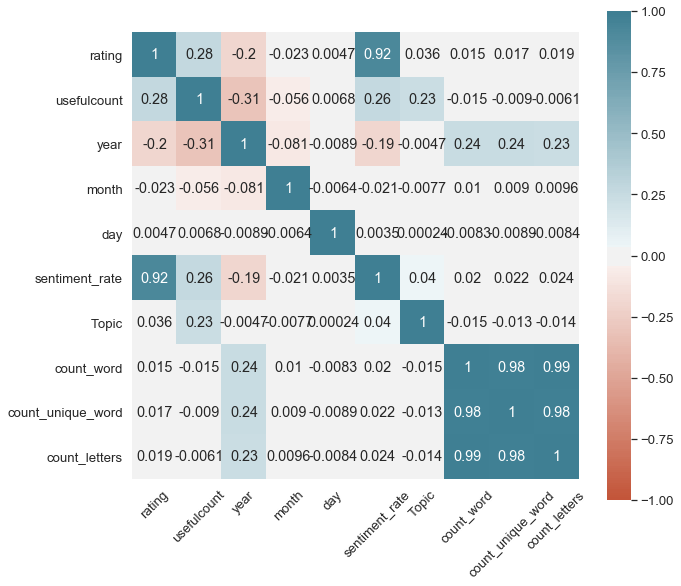

In [166]:
#Feature Selection on the basis of correlation matrix
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [10,9]
sns.set(font_scale = 1.2)
corr = df.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);


# consider all column due to some relation 

In [103]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

In [121]:
df['sentimentscore'].a

0       -0.122222
1       -0.300000
2        0.333333
3        0.700000
4        0.208974
           ...   
53761   -0.078571
53762    0.100265
53763    0.069949
53764    0.000000
53765    0.000000
Name: sentimentscore, Length: 53471, dtype: float64

In [106]:
df.columns

Index(['drugname', 'condition', 'rating', 'usefulcount', 'year', 'month',
       'day', 'processed_review', 'sentiment_rate', 'sentimentscore', 'Topic',
       'count_word', 'count_unique_word', 'count_letters', 'mean_word_len'],
      dtype='object')

In [128]:
df['mean_word_len']=df['mean_word_len'].fillna(0)
df.head()

,drugname,condition,rating,usefulcount,year,month,day,processed_review,sentiment_rate,sentimentscore,Topic,count_word,count_unique_word,count_letters,mean_word_len
0,1560,164,10,22,2012,2,28,ive tri antidepress year citalopram fluoxetin ...,1,-0.122222,5,42,37,274,5.547619
1,1487,148,8,17,2009,5,17,son ha crohn diseas ha done veri well asacol h...,1,-0.300000,2,32,28,170,4.343750
2,292,636,9,3,2017,9,29,quick reduct symptom,1,0.333333,2,3,3,20,6.000000
3,589,657,9,35,2017,3,5,contrav combin drug use alcohol smoke opioid c...,1,0.700000,8,74,66,419,4.675676
4,620,84,9,4,2015,10,22,thi birth control one cycl read review thi typ...,1,0.208974,1,76,59,431,4.684211


In [130]:
X = df[['drugname', 'condition', 'rating', 'usefulcount', 'year', 'month',
       'day','sentimentscore', 'Topic','count_word', 'count_unique_word', 'count_letters', 'mean_word_len']]

y = df['sentiment_rate']

In [141]:
X.shape,y.shape

((53471, 13), (53471,))

# Modeling

In [137]:
# NAIVE BAYES 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [138]:
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [158]:
print('\n\nAccuracy Score on test data with NaiveBaiyes : \n\n')
print(accuracy_score(y_test,y_pred))



Accuracy Score on test data with NaiveBaiyes : 


0.9886863020102852


In [143]:
# SUPPORT VECTOR MACHIME
from sklearn import svm

In [145]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42776, 13), (10695, 13), (42776,), (10695,))

In [146]:
clf = svm.SVC()

In [147]:
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [149]:
pred=clf.predict(X_test)

In [157]:
print('\n\nAccuracy Score on test data with svm: \n\n')
print(accuracy_score(y_test,pred))



Accuracy Score on test data with svm: 


0.6992052360916317


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42776, 13), (10695, 13), (42776,), (10695,))

In [153]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [154]:
pred1=neigh.predict(X_test)

In [156]:
print('\n\nAccuracy Score on test data with knn: \n\n')
print(accuracy_score(y_test,pred1))



Accuracy Score on test data with knn: 


0.7290322580645161


In [159]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
pred2=model.fit(X_train,y_train).predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [161]:
pred2

print('\n\nAccuracy Score on test data with linear regression: \n\n')
print(accuracy_score(y_test,pred2))



Accuracy Score on test data with linear regression: 


1.0


[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


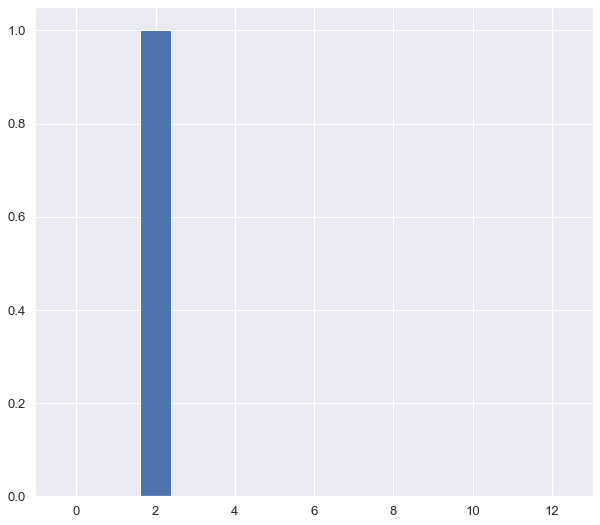

In [164]:
import xgboost
from xgboost import XGBClassifier
from matplotlib import pyplot
# split data into X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# fit model no training data
model1 = XGBClassifier()
model1.fit(X_train,y_train)
# feature importance
print(model1.feature_importances_)
# plot
pyplot.bar(range(len(model1.feature_importances_)), model1.feature_importances_)
pyplot.show()

In [167]:
pred3=model1.predict(X_test)

print('\n\nAccuracy Score on test data with linear regression: \n\n')
print(accuracy_score(y_test,pred3))



Accuracy Score on test data with linear regression: 


1.0
